Upload the CSV file now


Saving synthetic_credit_dataset_1000 - synthetic_credit_dataset_1000 (1).csv to synthetic_credit_dataset_1000 - synthetic_credit_dataset_1000 (1) (2).csv

Dataset Shape: (1000, 7)

Missing Values:

Respondent ID                0
Age                          0
Annual Income               50
Financial Responsibility    50
On-Time Payment             50
Credit Utilization          50
Credit Score                 0
dtype: int64

Min / Max Check:

       Annual Income  On-Time Payment  Credit Utilization  Credit Score
count    1000.000000      1000.000000         1000.000000   1000.000000
mean     1107.876550        76.056520           48.732790    764.931000
std       511.382348        13.883723           28.229924    163.176257
min       208.340000        50.020000            0.020000    395.000000
25%       656.112500        65.055000           24.910000    634.000000
50%      1118.140000        76.990000           48.135000    768.000000
75%      1527.537500        87.500000           7

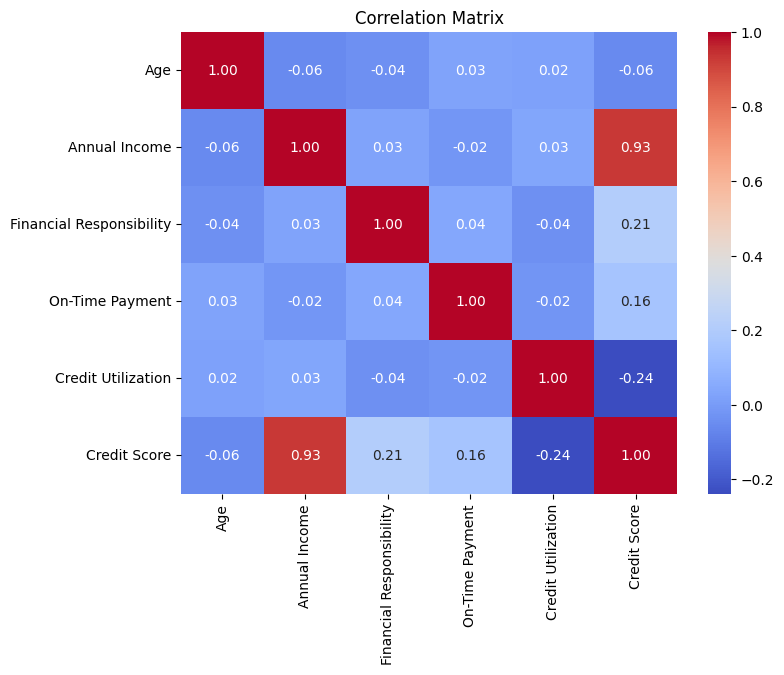

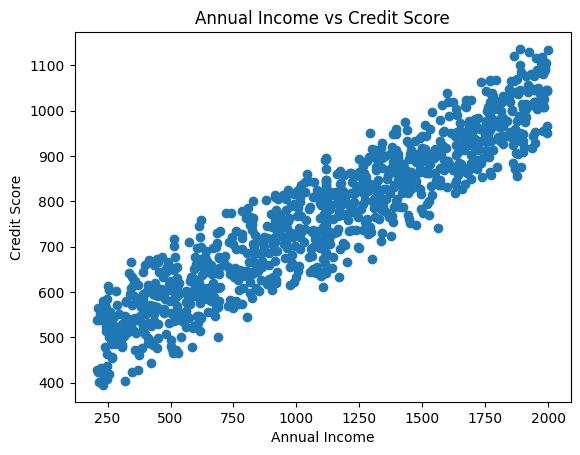

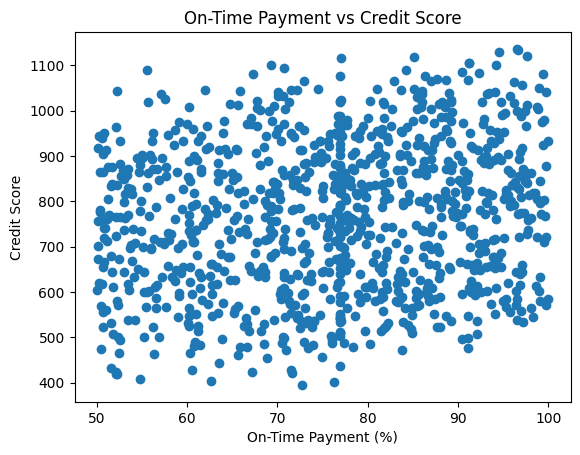

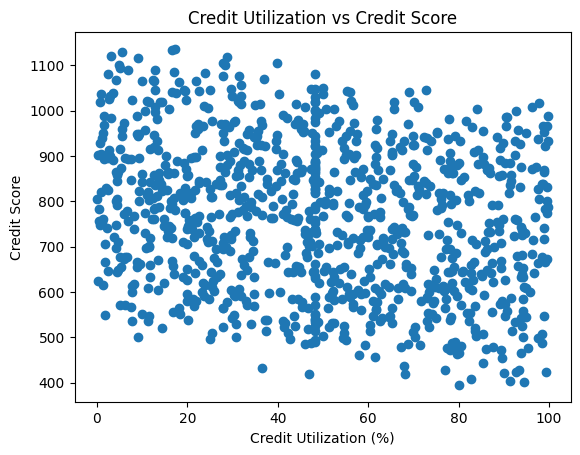


Random Forest Performance:
MAE: 18.231250000000003
RMSE: 23.001955188635602
R2: 0.9814117631788598
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Neural Network Performance:
MAE: 66.33048248291016
RMSE: 82.4862322792416
R2: 0.7609594464302063

Sample Prediction Comparison:


Predicted Credit Score for New Applicant:
1038.82


In [ ]:
# =========================================================
# CREDIT SCORE PREDICTION - FULL SINGLE NOTEBOOK CODE
# Course: Principle of Data Science (CSE 4357)
# =========================================================

# ---------- 1. Import Libraries ----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# ---------- 2. Upload Dataset ----------
print("Upload the CSV file now")
uploaded = files.upload()

# Use the uploaded filename automatically
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("\nDataset Shape:", df.shape)
df.head()

# ---------- 3. Check Missing Values ----------
print("\nMissing Values:\n")
print(df.isnull().sum())

# ---------- 4. Missing Value Indicators ----------
for col in ['Annual Income', 'Financial Responsibility',
            'On-Time Payment', 'Credit Utilization']:
    df[col + '_is_missing'] = df[col].isnull().astype(int)

# ---------- 5. Median Imputation ----------
df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].median())
df['Financial Responsibility'] = df['Financial Responsibility'].fillna(df['Financial Responsibility'].median())
df['On-Time Payment'] = df['On-Time Payment'].fillna(df['On-Time Payment'].median())
df['Credit Utilization'] = df['Credit Utilization'].fillna(df['Credit Utilization'].median())

# ---------- 6. Sanity Check ----------
print("\nMin / Max Check:\n")
print(df[['Annual Income','On-Time Payment',
          'Credit Utilization','Credit Score']].describe())

# ---------- 7. Feature Scaling ----------
features = ['Age','Annual Income','Financial Responsibility',
            'On-Time Payment','Credit Utilization']

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

# ---------- 8. Credit Score Range ----------
print("\nCredit Score Range:")
print("Min:", df['Credit Score'].min())
print("Max:", df['Credit Score'].max())

# ---------- 9. Financial Responsibility Groups ----------
def fr_group(x):
    if x <= 3:
        return "Low (1-3)"
    elif x <= 7:
        return "Medium (4-7)"
    else:
        return "High (8-10)"

df['FR_Group'] = df['Financial Responsibility'].apply(fr_group)

print("\nAverage Credit Scores by Financial Responsibility:\n")
print(df.groupby('FR_Group')['Credit Score'].agg(['count','mean','median']))

# ---------- 10. Correlation Matrix ----------
plt.figure(figsize=(8,6))
sns.heatmap(df[features + ['Credit Score']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# ---------- 11. Scatter Plots ----------
plt.figure()
plt.scatter(df['Annual Income'], df['Credit Score'])
plt.xlabel("Annual Income")
plt.ylabel("Credit Score")
plt.title("Annual Income vs Credit Score")
plt.show()

plt.figure()
plt.scatter(df['On-Time Payment'], df['Credit Score'])
plt.xlabel("On-Time Payment (%)")
plt.ylabel("Credit Score")
plt.title("On-Time Payment vs Credit Score")
plt.show()

plt.figure()
plt.scatter(df['Credit Utilization'], df['Credit Score'])
plt.xlabel("Credit Utilization (%)")
plt.ylabel("Credit Score")
plt.title("Credit Utilization vs Credit Score")
plt.show()

# ---------- 12. Train-Test Split ----------
X = df_scaled[features]
y = df['Credit Score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------- 13. Random Forest Model ----------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))

# ---------- 14. Neural Network Model ----------
nn = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

nn.compile(optimizer='adam', loss='mse')
nn.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

y_pred_nn = nn.predict(X_test).flatten()

print("\nNeural Network Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_nn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_nn)))
print("R2:", r2_score(y_test, y_pred_nn))

# ---------- 15. Sample Prediction Comparison ----------
comparison = pd.DataFrame({
    'Actual Credit Score': y_test.values[:5],
    'Predicted RF': y_pred_rf[:5],
    'Predicted NN': y_pred_nn[:5]
})

print("\nSample Prediction Comparison:\n")
comparison

# ---------- 16. New Applicant Prediction ----------
new_applicant = pd.DataFrame({
    'Age':[35],
    'Annual Income':[1800],
    'Financial Responsibility':[8],
    'On-Time Payment':[92],
    'Credit Utilization':[30]
})

new_applicant_scaled = pd.DataFrame(
    scaler.transform(new_applicant),
    columns=new_applicant.columns
)

predicted_score = rf.predict(new_applicant_scaled)
print("\nPredicted Credit Score for New Applicant:")
print(predicted_score[0])
print("Assignment group - 5 ")
